<a href="https://colab.research.google.com/github/HaThiKhanhLy/ML/blob/main/Lab_7_20130320_HaThiKhanhLy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [5]:
# code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
iris = datasets.load_iris()
x=iris.data
y=iris.target
clf = svm.SVC(kernel='sigmoid',random_state=0)
scores=cross_validate(clf,x,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code
cv=KFold(n_splits=10, random_state=1, shuffle=True)
model=svm.SVC(kernel='rbf', random_state=0)
scores= cross_val_score(model,x,y, scoring='accuracy',cv=cv)
print(scores.mean())
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y2_pred=clf.predict(x_test)
print(metrics.classification_report(y_test,y2_pred))

0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [ ]:
# code
from sklearn.cluster import KMeans
mnist=datasets.load_digits()
kmeans=KMeans(n_clusters=3, random_state=0 )
kmeans.fit(mnist.data)
clusters =kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(3, 64)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(mnist.data)
sse= []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans=KMeans(n_clusters=3, random_state=0 )
  kmeans.fit(mnist.data)
  clusters =kmeans.predict(mnist.data)
  sse.append(kmeans.inertia_)
print(sse)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463, 1730184.7025430463]


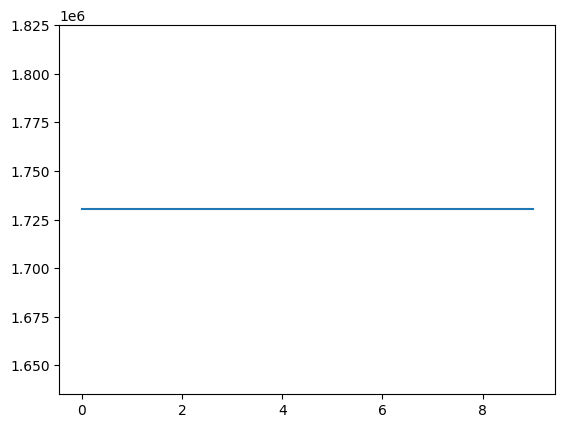

In [ ]:
plt.plot(sse)

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [ ]:
# code
# RandomForest
mnist=datasets.load_digits()
x=mnist.data
y=mnist.target
cv=KFold(n_splits=10, random_state=1, shuffle=True)
model=svm.SVC(kernel='rbf', random_state=0)
scores= cross_val_score(model,x,y, scoring='accuracy',cv=cv)
print(scores.mean())
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y2_pred=clf.predict(x_test)
print(metrics.classification_report(y_test,y2_pred))

0.9888671632526382
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.95      1.00      0.97        52
           2       1.00      0.94      0.97        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.98      1.00      0.99        60
           7       0.96      1.00      0.98        53
           8       0.98      0.95      0.97        61
           9       0.98      0.95      0.96        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix
model3= KNeighborsClassifier(n_neighbors=3)
mnistKNN=datasets.load_digits()
x=mnistKNN.data
y=mnistKNN.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
# scores= cross_val_score(model3,x,y, scoring='accuracy',cv=cv)
# print(scores.mean())
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      0.98      0.99        52
           2       0.98      1.00      0.99        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.97      0.98        61
           9       0.98      1.00      0.99        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
# Navi Bayes
from sklearn.naive_bayes import MultinomialNB
mnistKNN=datasets.load_digits()
x=mnistKNN.data
y=mnistKNN.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
model4=MultinomialNB().fit(x_train,y_train)
y_pred=model4.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        45
           1       0.88      0.81      0.84        52
           2       0.94      0.87      0.90        53
           3       1.00      0.81      0.90        54
           4       0.96      0.96      0.96        48
           5       0.98      0.82      0.90        57
           6       0.97      1.00      0.98        60
           7       0.88      0.98      0.93        53
           8       0.89      0.90      0.89        61
           9       0.71      0.93      0.80        57

    accuracy                           0.91       540
   macro avg       0.92      0.91      0.91       540
weighted avg       0.92      0.91      0.91       540



*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

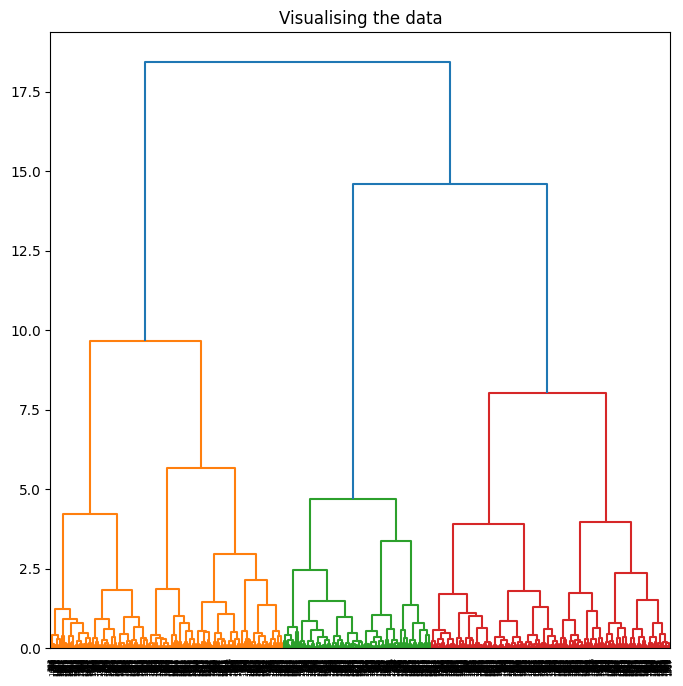

In [29]:
from sklearn.cluster import AgglomerativeClustering
mnist=datasets.load_digits()
x4=mnist.data
y4=mnist.target
# x4.fillna(method ='ffill', inplace = True)
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(x4)
Y_normalized = normalize(Y_scaled)
Y_normalized = pd.DataFrame(Y_normalized)
pca = PCA(n_components = 2)
Y_principal = pca.fit_transform(Y_normalized)
Y_principal = pd.DataFrame(Y_principal)
Y_principal.columns = ['P1', 'P2']
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(Y_principal, method ='ward')))

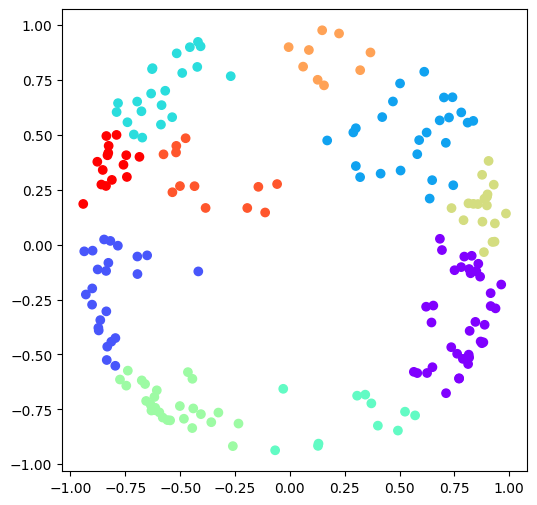

In [31]:
ac2 = AgglomerativeClustering(n_clusters = 10)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(Y_principal['P1'], Y_principal['P2'],
           c = ac2.fit_predict(Y_principal), cmap ='rainbow')
plt.show()

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [6]:
#code
data=pd.read_csv('shopping-data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
x=data.drop(columns='CustomerID')
x
data1=x
y=data1.drop(columns='Genre')
y

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


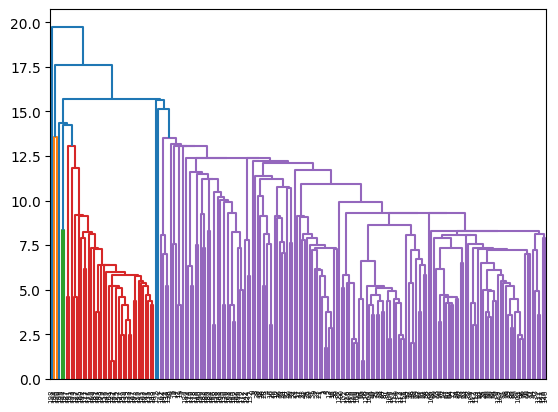

In [ ]:
from scipy.cluster import hierarchy
a= hierarchy.linkage(y, 'single')
plt.figure()
dn = hierarchy.dendrogram(a)

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code
from sklearn.cluster import KMeans
mnist=y
kmeans=KMeans(n_clusters=3, random_state=0 )
kmeans.fit(mnist)
clusters =kmeans.predict(mnist)
kmeans.cluster_centers_.shape
sse= []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans=KMeans(n_clusters=3, random_state=0 )
  kmeans.fit(mnist)
  clusters =kmeans.predict(mnist)
  sse.append(kmeans.inertia_)
print(sse)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[143342.751571706, 143342.751571706, 143342.751571706, 143342.751571706, 143342.751571706, 143342.751571706, 143342.751571706, 143342.751571706]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


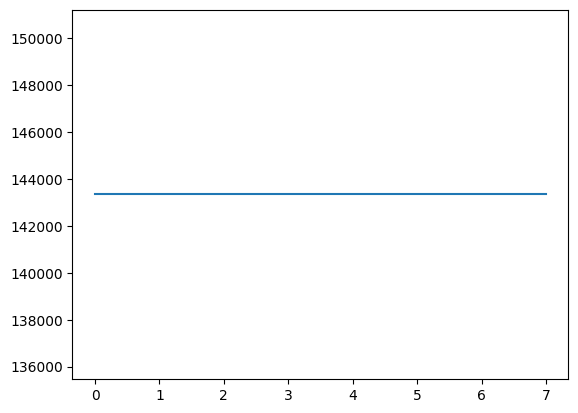

In [ ]:
plt.plot(sse)

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [24]:
#code
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

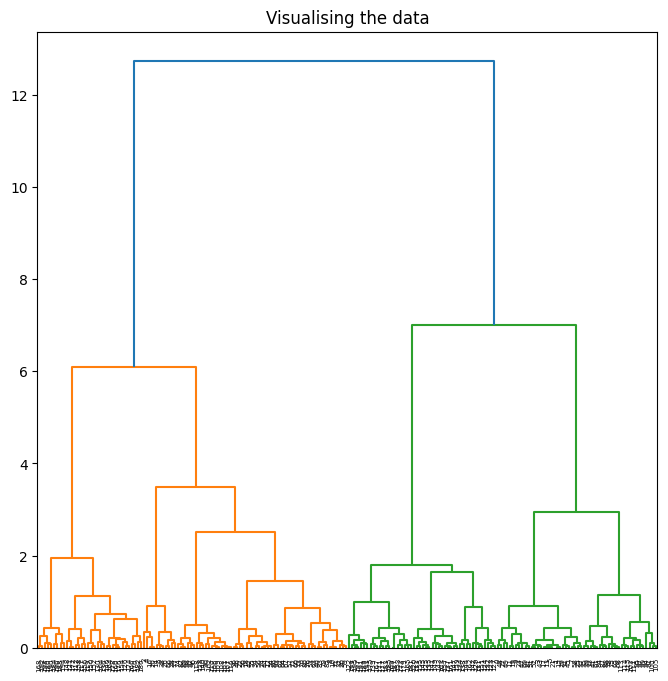

In [30]:
y
y.fillna(method ='ffill', inplace = True)
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(y)
Y_normalized = normalize(Y_scaled)
 
# Converting the numpy array into a pandas DataFrame
Y_normalized = pd.DataFrame(Y_normalized)
pca = PCA(n_components = 2)
Y_principal = pca.fit_transform(Y_normalized)
Y_principal = pd.DataFrame(Y_principal)
Y_principal.columns = ['P1', 'P2']
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(Y_principal, method ='ward')))

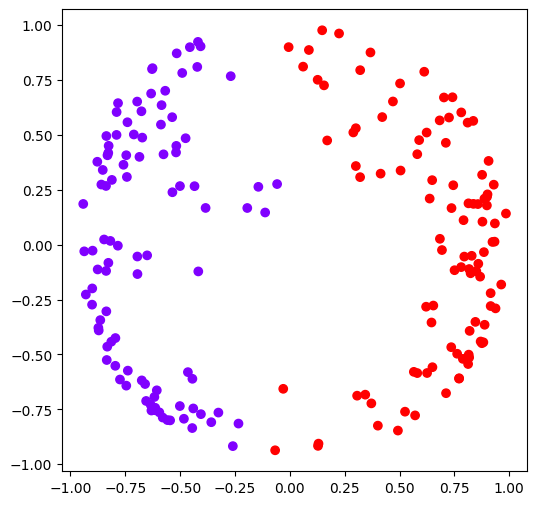

In [15]:
ac2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(Y_principal['P1'], Y_principal['P2'],
           c = ac2.fit_predict(Y_principal), cmap ='rainbow')
plt.show()

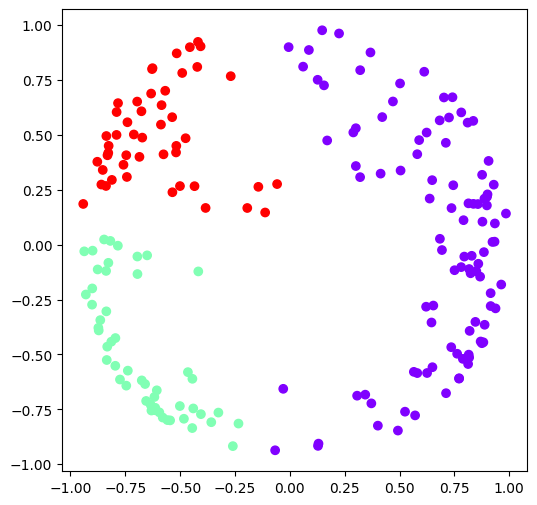

In [16]:

ac3 = AgglomerativeClustering(n_clusters = 3)
 
plt.figure(figsize =(6, 6))
plt.scatter(Y_principal['P1'], Y_principal['P2'],
           c = ac3.fit_predict(Y_principal), cmap ='rainbow')
plt.show()

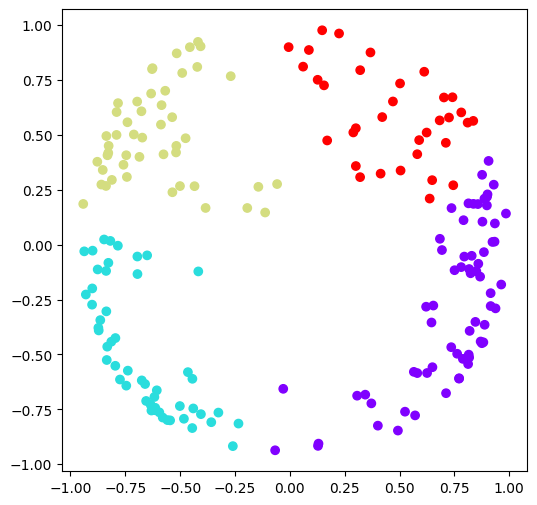

In [18]:

ac4 = AgglomerativeClustering(n_clusters = 4)
 
plt.figure(figsize =(6, 6))
plt.scatter(Y_principal['P1'], Y_principal['P2'],
            c = ac4.fit_predict(Y_principal), cmap ='rainbow')
plt.show()

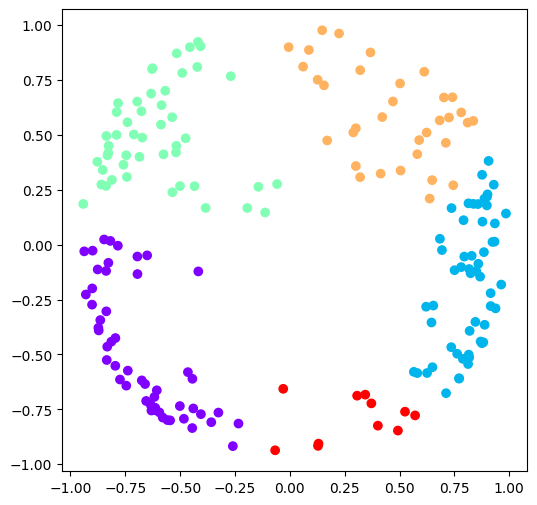

In [19]:

ac5 = AgglomerativeClustering(n_clusters = 5)
 
plt.figure(figsize =(6, 6))
plt.scatter(Y_principal['P1'], Y_principal['P2'],
            c = ac5.fit_predict(Y_principal), cmap ='rainbow')
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.